### Multiple Linear Regression

1. The main goal of this project is to predict the price of the house based on all the input features like area, no of bed rooms, no of bath rooms etc.

2. Then we can compare the accuracy of the model by comparing the actual price with the predicted price.


### Steps involved in this project:

1.    Import all the necessary libraries

2.    Load the dataset

3.    Explore data (EDA)

4.    Divide the dataset into independent and dependent variables

5.    Divide the independent and dependent variables into training and testing data

6.    Standardize the data

7.    Train the model

8.    Find the intercept and slope of the model

9.    Predict the model

10.    Model Evaluation

11.    Visualize actual vs predicted prices

### Step 1 : Import all the necessary libraries

In [2221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

### Step 2 :  Load the dataset

In [2222]:
df = pd.read_csv('Housing.csv')

In [2223]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### OBSERVATIONS:

1.  Here we have all the input features like area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus and based on all these features, we can predict the price of the house.

### Step 3 :  Explore data (EDA)

In [2224]:
### display the first five records of the dataset

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2225]:
### display the last five records of the dataset

print(df.tail())

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  


In [2226]:
### display the total number of records used in the dataset

print("Length of the dataset is:", len(df))

Length of the dataset is: 545


In [2227]:
### display the shape of the dataset

print(df.shape)

(545, 13)


In [2228]:
### get the information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [2229]:
### get the statistical summary about the dataset

print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [2230]:
### get the statistical summary about the categorical columns of the dataset

print(df.describe(include=['object']))

       mainroad guestroom basement hotwaterheating airconditioning prefarea  \
count       545       545      545             545             545      545   
unique        2         2        2               2               2        2   
top         yes        no       no              no              no       no   
freq        468       448      354             520             373      417   

       furnishingstatus  
count               545  
unique                3  
top      semi-furnished  
freq                227  


In [2231]:
### Check whether there are any NULL Values used in the dataset

print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### OBSERVATIONS:

1.  There are no NULL Values used in the dataset.

In [2232]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Perform One-Hot Encoding on all the categorical columns


1.  mainroad

In [2233]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [2234]:
### Replace all the 'yes' value of mainroad by 1 and 'no' value of the mainroad to 0

df['mainroad'].replace({'yes':1, 'no':0},inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\4232334201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mainroad'].replace({'yes':1, 'no':0},inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\4232334201.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['m

In [2235]:
### after converting all the categorical values to numerical

df['mainroad'].value_counts()

mainroad
1    468
0     77
Name: count, dtype: int64

2. guestroom

In [2236]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [2237]:
### Replace all the 'yes' value of guestroom by 1 and 'no' value of the guestroom to 0

df['guestroom'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\331266278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['guestroom'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\331266278.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['g

In [2238]:
df['guestroom'].value_counts()

guestroom
0    448
1     97
Name: count, dtype: int64

3. basement

In [2239]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [2240]:
### Replace all the 'yes' value of basement by 1 and 'no' value of the basement to 0

df['basement'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1689440657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['basement'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1689440657.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['

In [2241]:
df['basement'].value_counts()

basement
0    354
1    191
Name: count, dtype: int64

4. hotwaterheating

In [2242]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [2243]:
### Replace all the 'yes' value of hotwaterheating by 1 and 'no' value of the hotwaterheating to 0

df['hotwaterheating'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1274969558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hotwaterheating'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1274969558.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [2244]:
df['hotwaterheating'].value_counts()

hotwaterheating
0    520
1     25
Name: count, dtype: int64

5. airconditioning

In [2245]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [2246]:
### Replace all the 'yes' value of airconditioning by 1 and 'no' value of the airconditioning to 0

df['airconditioning'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\3463483909.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airconditioning'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\3463483909.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [2247]:
df['airconditioning'].value_counts()

airconditioning
0    373
1    172
Name: count, dtype: int64

6. prefarea

In [2248]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [2249]:
### Replace all the 'yes' value of prefarea by 1 and 'no' value of the prefarea to 0

df['prefarea'].replace({'yes':1, 'no':0}, inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1471612157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prefarea'].replace({'yes':1, 'no':0}, inplace=True)
C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_17688\1471612157.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['

In [2250]:
df['prefarea'].value_counts()

prefarea
0    417
1    128
Name: count, dtype: int64

7.  furnishingstatus

In [2251]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [2252]:
### perform the label encoder on the furnishing status

from sklearn.preprocessing import LabelEncoder


lab = LabelEncoder()



#### using LabelEncoder transform the 'furnishingstatus'

df['furnishingstatus'] = lab.fit_transform(df['furnishingstatus'])

In [2253]:
df['furnishingstatus'].value_counts()

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [2254]:
### display the entire dataset

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


### OBSERVATIONS:

1. Now we have obtained the entire transformed dataset.

### Step 4 :   Divide the dataset into independent and dependent variables

In [2255]:
X = df[['area','bedrooms','bathrooms']]

Y = df[['price']]

In [2256]:
### Independent variable

print(X)

     area  bedrooms  bathrooms
0    7420         4          2
1    8960         4          4
2    9960         3          2
3    7500         4          2
4    7420         4          1
..    ...       ...        ...
540  3000         2          1
541  2400         3          1
542  3620         2          1
543  2910         3          1
544  3850         3          1

[545 rows x 3 columns]


In [2257]:
### Dependent variable

print(Y)

        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]


#### OBSERVATIONS:

1. Here we have three inputs :- 
   
    (a.)  area --------> Area of the House.

    (b.)  bedrooms------> Total number of bedrooms used in the house.

    (c.)  bathrooms -----> Number of bathrooms ued in the house.

    (d.)  price ----------> Price of the house.

### Step 5 :   Divide the independent and dependent variables into training and testing data

In [2258]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [2259]:
### print the input

print("Shape of the input training data :", X_train.shape)
print("Shape of the input testing  data :", X_test.shape)

Shape of the input training data : (436, 3)
Shape of the input testing  data : (109, 3)


In [2260]:
### print the output

print("Shape of the output training data :", Y_train.shape)
print("Shape of the output testing  data :", Y_test.shape)

Shape of the output training data : (436, 1)
Shape of the output testing  data : (109, 1)


In [2261]:
X_train

,area,bedrooms,bathrooms
46,6000,3,2
93,7200,3,2
335,3816,2,1
412,2610,3,1
471,3750,3,1
...,...,...,...
71,6000,4,2
106,5450,4,2
270,4500,3,2
435,4040,2,1


In [2262]:
X_test

,area,bedrooms,bathrooms
316,5900,4,2
77,6500,3,2
360,4040,2,1
90,5000,3,1
493,3960,3,1
...,...,...,...
15,6000,4,1
357,6930,4,1
39,6000,4,2
54,6000,3,2


In [2263]:
Y_train

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000
...,...
71,6755000
106,6160000
270,4340000
435,3290000


In [2264]:
Y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


### Step 6 :  Standardize the data

In [2265]:
from sklearn.preprocessing import StandardScaler

### create the object for Standard Scaler

sc = StandardScaler()

### using the object for Standard Scaler, transform the input
print("---------------------------------------Training data------------------------------------------------")
print("---------------------------Original Data-----------------------------------")
print(X_train)

X_train_scaled = sc.fit_transform(X_train)

print("---------------------------Transformed Data-----------------------------------")
print(X_train_scaled)

---------------------------------------Training data------------------------------------------------
---------------------------Original Data-----------------------------------
     area  bedrooms  bathrooms
46   6000         3          2
93   7200         3          2
335  3816         2          1
412  2610         3          1
471  3750         3          1
..    ...       ...        ...
71   6000         4          2
106  5450         4          2
270  4500         3          2
435  4040         2          1
102  5500         3          2

[436 rows x 3 columns]
---------------------------Transformed Data-----------------------------------
[[ 0.38416819  0.05527092  1.53917323]
 [ 0.9291807   0.05527092  1.53917323]
 [-0.60775457 -1.28351359 -0.5579503 ]
 ...
 [-0.29709744  0.05527092  1.53917323]
 [-0.5060189  -1.28351359 -0.5579503 ]
 [ 0.15707965  0.05527092  1.53917323]]


### OBSERVATIONS:

1. After performing the scaling of all the inputs, all the input values are in one range.

In [2266]:
print("---------------------------------------Testing data------------------------------------------------")
print("---------------------------Original Data-----------------------------------")
print(X_test)

---------------------------------------Testing data------------------------------------------------
---------------------------Original Data-----------------------------------
     area  bedrooms  bathrooms
316  5900         4          2
77   6500         3          2
360  4040         2          1
90   5000         3          1
493  3960         3          1
..    ...       ...        ...
15   6000         4          1
357  6930         4          1
39   6000         4          2
54   6000         3          2
155  6100         3          2

[109 rows x 3 columns]


In [2267]:
print("--------------------------Transformed data---------------------------------------")

X_test_scaled = sc.transform(X_test)

print(X_test_scaled)

--------------------------Transformed data---------------------------------------
[[ 0.33875048  1.39405543  1.53917323]
 [ 0.61125674  0.05527092  1.53917323]
 [-0.5060189  -1.28351359 -0.5579503 ]
 [-0.0700089   0.05527092 -0.5579503 ]
 [-0.54235307  0.05527092 -0.5579503 ]
 [ 0.7111757   0.05527092 -0.5579503 ]
 [ 1.52869446  0.05527092 -0.5579503 ]
 [-0.07455067  1.39405543  1.53917323]
 [-0.86936058 -1.28351359 -0.5579503 ]
 [-1.11461621  0.05527092 -0.5579503 ]
 [ 1.55594508  1.39405543  3.63629675]
 [-0.55416168 -1.28351359 -0.5579503 ]
 [-0.65135557 -1.28351359 -0.5579503 ]
 [-0.93294537  0.05527092 -0.5579503 ]
 [-0.5378113   0.05527092 -0.5579503 ]
 [-0.69223151  0.05527092  3.63629675]
 [-1.43254017 -1.28351359 -0.5579503 ]
 [ 0.38416819  0.05527092 -0.5579503 ]
 [ 0.31604163  0.05527092 -0.5579503 ]
 [ 0.38416819 -1.28351359 -0.5579503 ]
 [-0.06092536  0.05527092 -0.5579503 ]
 [ 0.75886429  0.05527092 -0.5579503 ]
 [-0.68360215 -1.28351359 -0.5579503 ]
 [-0.61502141  0.0552

### OBSERVATIONS:

1. Here we have standardized all the input values so as to bring them in one range.

2. Here we have used fit_transform in the input training data as it first finds out the mean and standard deviation from the data and then scales the data.

3. We have used transform in the input testing data as it only scales the data.

### Step 7 :  Train the model

In [2268]:
X_train_scaled

array([[ 0.38416819,  0.05527092,  1.53917323],
       [ 0.9291807 ,  0.05527092,  1.53917323],
       [-0.60775457, -1.28351359, -0.5579503 ],
       ...,
       [-0.29709744,  0.05527092,  1.53917323],
       [-0.5060189 , -1.28351359, -0.5579503 ],
       [ 0.15707965,  0.05527092,  1.53917323]], shape=(436, 3))

In [2269]:
Y_train 

,price
46,7525000
93,6300000
335,3920000
412,3430000
471,3010000
...,...
71,6755000
106,6160000
270,4340000
435,3290000


In [2270]:
### Train the model using training data

from sklearn.linear_model import LinearRegression

### create an object for linear regression

lr = LinearRegression()

### fit and train the data

lr.fit(X_train_scaled, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### OBSERVATIONS:

1. Here the model for Linear Regression has been trained using the training data.

### Step 8 :  Find the intercept and slope of the model

In [2271]:
print("Slope :", lr.coef_[0])

print("Intercept :", lr.intercept_)

Slope : [760642.88074097 269048.2662201  678224.07261084]
Intercept : [4706527.3853211]


## OBSERVATIONS:

1. As in the Multiple Linear Regression, we have multiple number of input features, we have multiple number of slopes.

### Step 9:  Predict the model

In [2272]:
Y_pred = lr.predict(X_test)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [2273]:
Y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


In [2274]:
Y_pred

array([[4.49493216e+09],
       [4.95104885e+09],
       [3.07892009e+09],
       [3.80940630e+09],
       [3.01833770e+09],
       [5.11771205e+09],
       [6.48686924e+09],
       [3.80274714e+09],
       [2.47040578e+09],
       [2.05992767e+09],
       [6.53413331e+09],
       [2.99829194e+09],
       [2.83551436e+09],
       [2.36418483e+09],
       [3.02594413e+09],
       [2.76868200e+09],
       [1.52720861e+09],
       [4.57004918e+09],
       [4.45595275e+09],
       [4.56978013e+09],
       [3.82461916e+09],
       [5.19757956e+09],
       [2.78150872e+09],
       [2.89663484e+09],
       [6.28149566e+09],
       [7.58287321e+09],
       [2.35630935e+09],
       [2.28879876e+09],
       [1.00466779e+10],
       [2.28785149e+09],
       [3.04944164e+09],
       [2.37939768e+09],
       [4.57072740e+09],
       [5.03784455e+09],
       [3.63853070e+09],
       [3.50582737e+09],
       [3.54013872e+09],
       [2.42530531e+09],
       [2.65322912e+09],
       [2.12705088e+09],


### OBSERVATIONS:

1. Y_test is a series 

2. Y_pred is a numpy array

So it cannot be compared at par with each other.

To do it, we need to convert the numpy array into series

In [2275]:
### use the flatten to convert the numpy array into series

Y_pred = Y_pred.flatten()

print(Y_pred)

[4.49493216e+09 4.95104885e+09 3.07892009e+09 3.80940630e+09
 3.01833770e+09 5.11771205e+09 6.48686924e+09 3.80274714e+09
 2.47040578e+09 2.05992767e+09 6.53413331e+09 2.99829194e+09
 2.83551436e+09 2.36418483e+09 3.02594413e+09 2.76868200e+09
 1.52720861e+09 4.57004918e+09 4.45595275e+09 4.56978013e+09
 3.82461916e+09 5.19757956e+09 2.78150872e+09 2.89663484e+09
 6.28149566e+09 7.58287321e+09 2.35630935e+09 2.28879876e+09
 1.00466779e+10 2.28785149e+09 3.04944164e+09 2.37939768e+09
 4.57072740e+09 5.03784455e+09 3.63853070e+09 3.50582737e+09
 3.54013872e+09 2.42530531e+09 2.65322912e+09 2.12705088e+09
 6.07612208e+09 2.76705651e+09 4.89019741e+09 3.20089200e+09
 5.14026229e+09 4.48230620e+09 4.57072740e+09 3.53584391e+09
 6.12909804e+09 2.28785149e+09 5.69267565e+09 2.28785149e+09
 5.91611803e+09 3.42908486e+09 2.77520103e+09 2.21966268e+09
 4.38056668e+09 1.83173481e+09 4.91260753e+09 2.89636579e+09
 2.42544543e+09 1.63084267e+09 4.90446300e+09 3.77871154e+09
 4.08323774e+09 2.866209

In [2276]:
Y_test.ndim

2

In [2277]:
Y_test['price']

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [2278]:
Y_pred.ndim

1

In [2279]:
### Comparing the actual vs predicted output


comparision_df = pd.DataFrame({
    'Actual'       : Y_test['price']           ,
    'Predicted'    : Y_pred                    ,
    'Residual'     : Y_test['price'] - Y_pred
}
)

print(comparision_df) 



      Actual     Predicted      Residual
316  4060000  4.494932e+09 -4.490872e+09
77   6650000  4.951049e+09 -4.944399e+09
360  3710000  3.078920e+09 -3.075210e+09
90   6440000  3.809406e+09 -3.802966e+09
493  2800000  3.018338e+09 -3.015538e+09
..       ...           ...           ...
15   9100000  4.570318e+09 -4.561218e+09
357  3773000  5.277716e+09 -5.273943e+09
39   7910000  4.570996e+09 -4.563086e+09
54   7350000  4.570727e+09 -4.563377e+09
155  5530000  4.646792e+09 -4.641262e+09

[109 rows x 3 columns]


#### OBSERVATIONS:

1.  Here we have obtained the Actual Price vs Predicted Price as well as the difference between the price.

### Step 10 :  Model Evaluation

In [2280]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

print("R2 Score of the model is :", r2_score(Y_test, Y_pred))
print("Mean Absolute Error of the model is:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error of the model is:", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error of the model is:", root_mean_squared_error(Y_test, Y_pred))

R2 Score of the model is : -3491848.649016904
Mean Absolute Error of the model is: 3908190313.530933
Mean Squared Error of the model is: 1.764979934068252e+19
Root Mean Squared Error of the model is: 4201166426.206241


### Step 11:   Visualize actual vs predicted prices

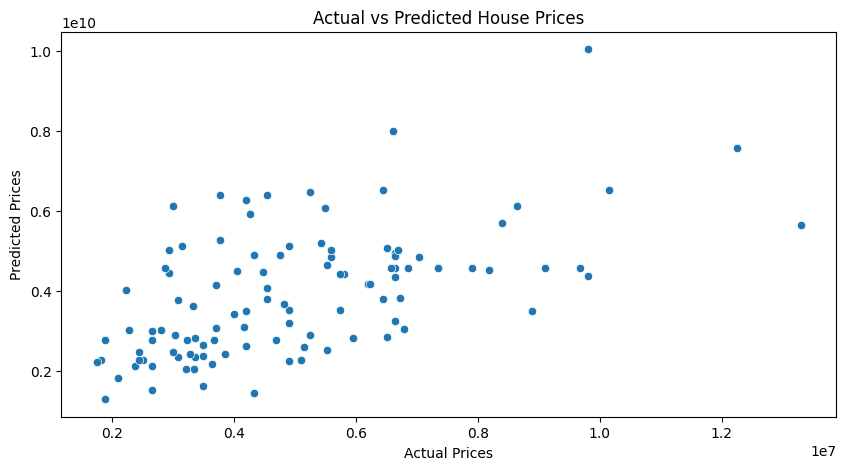

In [2281]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = Y_test['price'], y = Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

### OBSERVATIONS:

1. From the above graph, we can see that with the increase in actual price, the predicted price also increases.